In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # this is for visualization
import seaborn as sns # for visualization
%matplotlib inline
import statsmodels.formula.api as sm
import scipy, scipy.stats
import math # log function is inside this library
from pandas import Series, DataFrame
from collections import Counter

In [160]:
df = pd.read_csv("Suicide data set.csv")

In [19]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [20]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [22]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

# Section-A

#### Ques1. How many categorical variables does the data contain? Please state the number of categories for each such variable.

In [24]:
df1 = DataFrame(df.dtypes)
df1

,0
country,object
year,int64
sex,object
age,object
suicides_no,int64
population,int64
suicides/100k pop,float64
country-year,object
HDI for year,float64
gdp_for_year ($),object


Country, sex, age, country-year, gdp_for_year($), generation are the categorical variables as data explanes. 

In [30]:
len(df['country'].value_counts()) #101 countries are there present in the data

101

In [32]:
df['sex'].value_counts() #2 types of categories are there Male, Female

male      13910
female    13910
Name: sex, dtype: int64

In [34]:
df['age'].value_counts() #6 types of age categories are there 

25-34 years    4642
55-74 years    4642
15-24 years    4642
35-54 years    4642
75+ years      4642
5-14 years     4610
Name: age, dtype: int64

In [38]:
df['country-year'].value_counts() #2321 categories are there for country-year

Italy1999                           12
Turkmenistan2002                    12
Saint Lucia2000                     12
Ireland2007                         12
Qatar2006                           12
Thailand2014                        12
Italy1998                           12
Bahamas2013                         12
Belgium2013                         12
Bulgaria2012                        12
Latvia1998                          12
Czech Republic2011                  12
Ireland1996                         12
Croatia2004                         12
Estonia2007                         12
South Africa2015                    12
Saint Lucia1986                     12
Argentina1986                       12
Serbia2002                          12
Uruguay1986                         12
Panama2001                          12
Ukraine1995                         12
Cyprus2006                          12
Russian Federation1989              12
Portugal2003                        12
Ireland1989              

In [48]:
df['generation'].value_counts() #6 categories are there for generation

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

#### Ques2. How strong is the correlation between HDI and suicides_no?

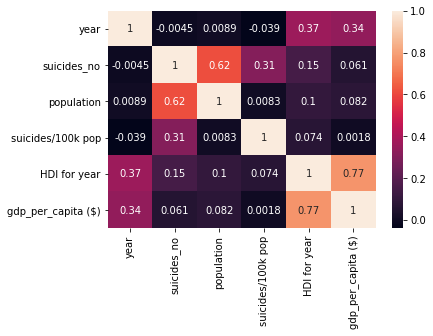

In [49]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
plt.show()

There is a positive weak correlation between HDI for year and suicides_no eaual to 0.15

#### Ques4. Which generation has the highest number of suicides/100k pop?

In [56]:
df.groupby(['generation'])['suicides/100k pop'].count()

generation
Boomers            4990
G.I. Generation    2744
Generation X       6408
Generation Z       1470
Millenials         5844
Silent             6364
Name: suicides/100k pop, dtype: int64

#### Ques5. Which country has the least number of suicides between 1990-1995?

In [122]:
year_req = (df['year'] > 1990) & (df['year'] < 1995)
#country_suicide = pd.crosstab(df.country,df.year_req)
#country_suicide
df.groupby(['country','year_req'])['suicides_no'].count()

KeyError: 'year_req'

In [63]:
df.groupby(['country','year'])['suicides_no'].count()

country              year
Albania              1987    12
                     1988    12
                     1989    12
                     1992    12
                     1993    12
                     1994    12
                     1995    12
                     1996    12
                     1997    12
                     1998    12
                     1999    12
                     2000    12
                     2001    12
                     2002    12
                     2003    12
                     2004    12
                     2005    12
                     2006    12
                     2007    12
                     2008    12
                     2009    12
                     2010    12
Antigua and Barbuda  1985    12
                     1986    12
                     1987    12
                     1988    12
                     1989    12
                     1990    12
                     1991    12
                     1992    12
              

# Section B

#### Ques1. Are there any countries with no suicides recorded?  Create a new data frame which ranks these countries by HDI.

In [77]:
No_suicides = df['suicides_no']==0

In [87]:
df.groupby(['country'])(df['suicides_no']==0).count()

TypeError: 'DataFrameGroupBy' object is not callable

In [90]:
df.groupby(['country'])[df["suicides_no"]==0].count()

KeyError: 'Columns not found: False, True'

#### Ques2. Generate suitable graphs for comparing suicides between men and women for the top 5 countries with the highest suicide rate per 100,000.

#### Ques3. Are there any redundant columns in the dataset? Which coulmn is it? Can that column be dropped? State your reasons.

In [91]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

HDI for year can be dropped beacuse it is of float type and there are 19456 null values are there. 

#### Ques4. Please obtain the distribution of suicides for each age group for Argentina. Plot these as graphs

In [ ]:
def f(x):
    return Series(dict(Number_of_earthquakes = x['ID'].count(),
                       Intensity = x['Magnitude'].mean()
                       ))
f(df)

In [109]:
suicide_dist = df.groupby(['country','suicides_no','age'])['age'].count()
suicide_dist

country     suicides_no  age        
Albania     0            15-24 years     6
                         25-34 years     6
                         35-54 years     6
                         5-14 years     20
                         55-74 years     9
                         75+ years      11
            1            5-14 years     11
                         55-74 years     5
                         75+ years       9
            2            25-34 years     1
                         35-54 years     2
                         5-14 years      5
                         55-74 years     2
                         75+ years      13
            3            25-34 years     1
                         5-14 years      1
                         55-74 years     3
                         75+ years       5
            4            25-34 years     4
                         35-54 years     2
                         5-14 years      3
                         55-74 years     2
                 

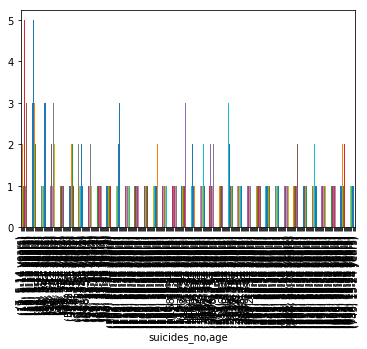

In [104]:
suicide_dist['Argentina'].plot(kind = 'bar')

#### Ques9. Generate a correlation heatmap for the dataset. Which pairs of variables are highly correlated.

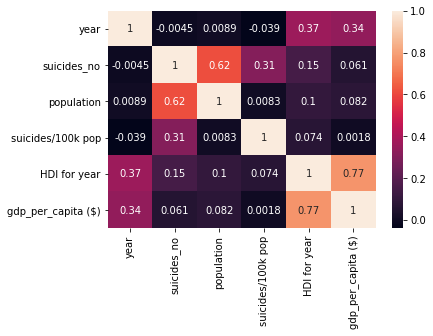

In [111]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
plt.show()

Population and suicide number = 0.62, HDI for year and gdp_per_capita = 0.77. These are two hihgly correlated terms. 

# Section-C

#### Ques10. Generate the following tables:

a)	A table containing the columns ‘Country’, ‘Year’, ‘Total suicides’. Total Suicides has to be calculated from the existing table.

In [125]:
table=pd.crosstab(df.country,df.year)
table

year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Albania,0,0,12,12,12,0,0,12,12,12,...,12,12,12,12,0,0,0,0,0,0
Antigua and Barbuda,12,12,12,12,12,12,12,12,12,12,...,12,12,12,0,0,12,12,12,12,0
Argentina,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,0
Armenia,0,0,0,0,0,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,10
Aruba,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,0,0,0,0,0
Australia,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,0
Austria,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,10
Azerbaijan,0,0,0,0,0,12,12,12,12,12,...,12,0,0,0,0,0,0,0,0,0
Bahamas,12,0,12,0,0,0,0,0,12,12,...,12,12,12,12,12,12,12,0,0,0


b) A Table containing the columns ‘Country’, ‘Year’, ‘per capita gdp’.

In [147]:

table=pd.crosstab(df.country,df.year,df.gdp_per_capita($))
table

SyntaxError: invalid syntax (<ipython-input-147-974fd209f07f>, line 2)

In [136]:
df.gdp_per_capita($)

SyntaxError: invalid syntax (<ipython-input-136-68bfe2b8f3d5>, line 1)